<center>

**CIFRADOS DE FLUJO**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>

# **🔐Cifrado de Fish🔐**

<center>

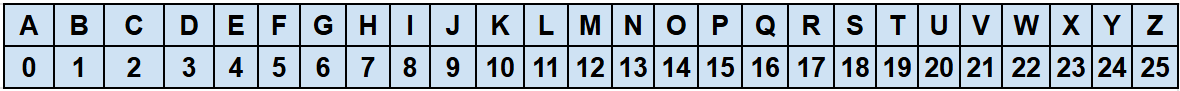

</center>

<div align="justify">

El cifrado Fish es un esquema de flujo basado en la composición de dos Vigenère con claves de longitudes coprimas, que se reduce a un único Vigenère de periodo extendido.


Sea  
 $$\mathcal{A} = \{A,B,\dots,Z\}$$ el alfabeto de tamaño $$q=26$$

Una clave $$k_1 = k_{1,0}\,k_{1,1}\cdots k_{1,\ell_1-1}\in\mathcal{A}^{\ell_1}$$

Otra clave $$k_2 = k_{2,0}\,k_{2,1}\cdots k_{2,\ell_2-1}\in\mathcal{A}^{\ell_2}$$

Un texto claro $$p = p_0\,p_1\cdots p_{n-1}\in\mathcal{A}^n$$

Definimos la clave compuesta  

$$
L = \mathrm{lcm}(\ell_1,\ell_2),
\qquad
K_i = k_{1,\;i \bmod \ell_1} \;\oplus\; k_{2,\;i \bmod \ell_2}
\quad (0\le i<L),
$$  
donde la operación César  
$$
x\oplus y = \bigl(\mathrm{idx}(x)+\mathrm{idx}(y)\bigr)\bmod 26
$$  
suma los índices numéricos de $x,y$ en $\mathbb{Z}/26\mathbb{Z}$.

El cifrado de $p$ con $K$ es  
$$
z_t = p_t \oplus K_{\,t\bmod L},
\quad 0\le t<n.
$$

Para descifrar, aplicamos  
$$
p_t = z_t \ominus K_{\,t\bmod L}
= \bigl(\mathrm{idx}(z_t)-\mathrm{idx}(K_{\,t\bmod L})\bigr)\bmod 26.
$$

---


**Estructura algebraica**

- **Grupo aditivo**  
   $$\mathbb{Z}/26\mathbb{Z}$$ con operación $$+\bmod26$$

- **Espacio de claves**  
   $$\mathcal{K}_1=\mathcal{A}^{\ell_1},\quad \mathcal{K}_2=\mathcal{A}^{\ell_2}.$$

- **Composición**  

  La función  
   $$
     \varphi:\mathcal{K}_1\times\mathcal{K}_2\to\mathcal{A}^L,\qquad
     \varphi(k_1,k_2)_i
     = k_{1,i\bmod\ell_1}+k_{2,i\bmod\ell_2}\bmod 26
   $$

   convierte el doble Vigenère en uno solo de periodo $$L$$

- **Automorfismos afines**  
   
   Cada letra de clave define  
   $$
     f_k(x)=x+k\pmod{26},\quad
     f_k^{-1}(x)=x-k\pmod{26}.
   $$

   El cifrado es la aplicación coordenada  
   $$
     z_t = f_{K_{t\bmod L}}(p_t).
   $$

---

**Propiedades criptográficas**

- **Periodo extendido**
  $L=\mathrm{lcm}(\ell_1,\ell_2)$ crece hasta $\ell_1\ell_2$ si $\gcd(\ell_1,\ell_2)=1$

- **Susceptibilidad**  
  Equivale a Vigenère de periodo $L$, por lo que su criptoanálisis recae en:
  1. Ataque de Kasiski (repeticiones de n-gramas).  
  2. Prueba $\chi^2$ en cada subcadena de longitud divisor de $L$.  

- **Ventaja práctica**  

  Gestión de dos claves cortas en lugar de una larga.  
  Complejidad de fuerza bruta $26^L$.

- **Requisitos**  
  Claves generadas con entropía suficiente y $\gcd(\ell_1,\ell_2)$ mínimo para maximizar $L$

</div>

**📥Importaciones📦**

In [ ]:

import math, string
import ipywidgets as wd
from IPython.display import display, clear_output

**👨‍💻Implementación👩‍💻**

In [ ]:

ABC   = string.ascii_uppercase
IDX   = {c:i for i,c in enumerate(ABC)}
def _clean(s): return ''.join(ch for ch in s.upper() if ch in ABC)
def _shift(c,k): return ABC[(IDX[c] + IDX[k]) % 26]

def fish_encrypt(plaintext, k1, k2):
    p = _clean(plaintext); k1 = _clean(k1); k2 = _clean(k2)
    if not p or not k1 or not k2:
        raise ValueError("Texto y ambas claves deben estar presentes")
    L = math.lcm(len(k1), len(k2))
    comp = [ABC[(IDX[k1[i%len(k1)]] + IDX[k2[i%len(k2)]])%26] for i in range(L)]
    comp_key = ''.join(comp)
    ct = ''.join(_shift(ch, comp_key[i%L]) for i,ch in enumerate(p))
    return ct, comp_key

def fish_decrypt(ciphertext, comp_key):
    ct = _clean(ciphertext); ck = _clean(comp_key)
    if not ct or not ck:
        raise ValueError("Texto cifrado y clave compuesta requeridos")
    pt = ''.join(ABC[(IDX[ch] - IDX[ck[i%len(ck)]]) % 26]
                 for i,ch in enumerate(ct))
    return pt

**👨‍💻Implementación👩‍💻**

In [ ]:

style = {'description_width':'120px'}

txt = wd.Textarea(
    placeholder="Escribe o pega el texto...",
    description="Texto:", layout=wd.Layout(width='100%', height='100px'),
    style=style
)
k1 = wd.Text(placeholder="FOXES", description="Clave 1:", style=style)
k2 = wd.Text(placeholder="WOLVES", description="Clave 2:", style=style)
mode = wd.ToggleButtons(
    options=[('Cifrar','enc'),('Descifrar','dec')],
    description='Modo:', button_style='primary'
)
out_ct = wd.Textarea(
    description="Resultado:",
    layout=wd.Layout(width='100%', height='80px'),
    style=style
)
out_info = wd.HTML(layout=wd.Layout(margin='10px 0'))

btn = wd.Button(description="Ejecutar", button_style='info')

def on_click(event):
    clear_output(wait=True)
    display(ui)
    try:
        if mode.value == 'enc':
            ct, comp = fish_encrypt(txt.value, k1.value, k2.value)
            out_ct.value = ct
            out_info.value = (
                f"<b>Clave compuesta:</b> {comp}<br>"
                f"<b>Periodo:</b> {len(comp)}"
            )
        else:

            comp = k1.value.strip()
            pt = fish_decrypt(txt.value, comp)
            out_ct.value = pt
            out_info.value = f"<b>Descifrado con clave:</b> {comp}"
    except Exception as e:
        out_ct.value = f"❌ Error: {e}"

btn.on_click(on_click)

ui = wd.VBox([
    wd.HTML("<h2 style='color:#663399;text-align:center;'> Cifrado Fish</h2>"),
    txt,
    wd.HBox([k1, k2, mode, btn]),
    out_info,
    out_ct
])

display(ui)
